# Hotel Analysis EDA and Visualization


## 1. Data Prepocessing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.2 MB/s 
     |████████████████████████████████| 944 kB 47.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [3]:
df = pd.read_csv('hotel_bookings_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.isnull().sum()/len(df)

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_weekdays_nights          0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
city                              0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent                             0.136862
company                           0.943069
days_in_wai

In [6]:
df1 = df.copy()
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,No Deposit,394.0,NaN,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,No Deposit,9.0,NaN,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,No Deposit,9.0,NaN,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,No Deposit,89.0,NaN,0,Personal,104.40,0,0,Check-Out


### Handle invalid and Null value

In [7]:
# Drop columns with too many Null value
df1.drop(columns=['company','agent'],inplace=True)

In [8]:
df1['meal'] = df1['meal'].apply(lambda x:x.replace('Undefined','No Meal'))

In [9]:
df1['children'].fillna(0,inplace=True)

In [10]:
for column in df1:
    print(f'''value count {column}:''')
    print(df1[column].value_counts())
    print()

value count hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

value count is_canceled:
0    75166
1    44224
Name: is_canceled, dtype: int64

value count lead_time:
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64

value count arrival_date_year:
2018    56707
2019    40687
2017    21996
Name: arrival_date_year, dtype: int64

value count arrival_date_month:
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64

value count arrival_date_week_number:
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38   

In [11]:
df1.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_weekdays_nights            0
adults                              0
children                            0
babies                              0
meal                                0
city                              488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_

In [12]:
df1['children'] = df1['children'].astype(int)

### handle unused columns

In [13]:
df1['total_guest'] = df1['adults'] + df1['children']

In [14]:
df1.drop(columns=['children','babies','days_in_waiting_list'],inplace=True)

In [15]:
df_hotel = df1[df1['total_guest'] > 0]

In [16]:
df_hotel.total_guest.value_counts()

2     82768
1     22591
3      9933
4      3799
5       104
26        5
27        2
20        2
12        1
40        1
50        1
55        1
6         1
10        1
Name: total_guest, dtype: int64

In [17]:
df1['arrival_date_month'].unique()

array(['September', 'October', 'November', 'December', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August'],
      dtype=object)

In [18]:
#Changing format month so it can be sorted for further analysis

df_hotel['month'] = pd.to_datetime(df_hotel['arrival_date_month'],format='%B').dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 2. Monthly Average of Hotel Booking 

In [19]:
import numpy as np
table1 = pd.pivot_table(df_hotel, values='total_guest', index=['arrival_date_year','month'],columns='hotel',aggfunc=np.sum)
table1

hotel                    City Hotel  Resort Hotel
arrival_date_year month                          
2017              1            1943          1843
                  2            3027          2397
                  9            2685          3004
                  10           4862          3111
                  11           6372          3323
                  12           6008          3044
2018              1            5559          2422
                  2            5080          2614
                  3            2269          1543
                  4            4318          2870
                  5            5878          3349
                  6            7010          3437
                  7            6925          3463
                  8            7234          2826
                  9            6836          3206
                  10           7634          3885
                  11           7548          3036
                  12           8091          3839
2019              3            4422          2242
                  4            5027          3025
                  5            6424          2724
                  6            8067          3433
                  7            8522          3474
                  8            7854          3496
                  9            7647          4108
                  10           6844          4239

In [20]:
book = df_hotel[df_hotel['is_canceled']==0]

In [58]:
# Normalized month first due to different month each year has
guest = book.groupby(['hotel','month','arrival_date_year']).apply(lambda x: pd.Series({'total_guest':x.total_guest.sum()})).reset_index()
guest_year = guest.groupby(['hotel','month']).apply(lambda x: pd.Series({'total_guest':x.total_guest.sum(),
                                                                         'amount_of_year':x.arrival_date_year.count()
                                                                        })).reset_index()
guest_year['avg_customer']= round(guest_year['total_guest']/guest_year['amount_of_year'],1)
guest_year

,hotel,month,total_guest,amount_of_year,avg_customer
0,City Hotel,1,4546,2,2273.0
1,City Hotel,2,4680,2,2340.0
2,City Hotel,3,3973,2,1986.5
3,City Hotel,4,5693,2,2846.5
4,City Hotel,5,7606,2,3803.0
5,City Hotel,6,8130,2,4065.0
6,City Hotel,7,8566,2,4283.0
7,City Hotel,8,8374,2,4187.0
8,City Hotel,9,10239,3,3413.0
9,City Hotel,10,11567,3,3855.7


In [22]:
hotel_year = guest_year.groupby(['hotel']).agg({'avg_customer':'sum'})
merge = guest_year.merge(hotel_year, on=['hotel'])
merge['percentage'] = round((merge['avg_customer_x']/merge['avg_customer_y'])*100,2)
merge

,hotel,month,total_guest,amount_of_year,avg_customer_x,avg_customer_y,percentage
0,City Hotel,1,4546,2,2273.0,40929.7,5.55
1,City Hotel,2,4680,2,2340.0,40929.7,5.72
2,City Hotel,3,3973,2,1986.5,40929.7,4.85
3,City Hotel,4,5693,2,2846.5,40929.7,6.95
4,City Hotel,5,7606,2,3803.0,40929.7,9.29
5,City Hotel,6,8130,2,4065.0,40929.7,9.93
6,City Hotel,7,8566,2,4283.0,40929.7,10.46
7,City Hotel,8,8374,2,4187.0,40929.7,10.23
8,City Hotel,9,10239,3,3413.0,40929.7,8.34
9,City Hotel,10,11567,3,3855.7,40929.7,9.42


In [23]:
guest_pivot = pd.pivot_table(merge, values=['avg_customer_x','percentage'], index='month',columns='hotel')
guest_pivot

avg_customer_x              percentage             
hotel     City Hotel Resort Hotel City Hotel Resort Hotel
month                                                    
1             2273.0       1718.0       5.55         6.70
2             2340.0       1875.0       5.72         7.31
3             1986.5       1584.0       4.85         6.18
4             2846.5       2139.0       6.95         8.34
5             3803.0       2293.0       9.29         8.94
6             4065.0       2331.5       9.93         9.09
7             4283.0       2407.5      10.46         9.39
8             4187.0       2046.0      10.23         7.98
9             3413.0       2328.7       8.34         9.08
10            3855.7       2471.0       9.42         9.63
11            3928.5       2071.5       9.60         8.08
12            3948.5       2384.5       9.65         9.30

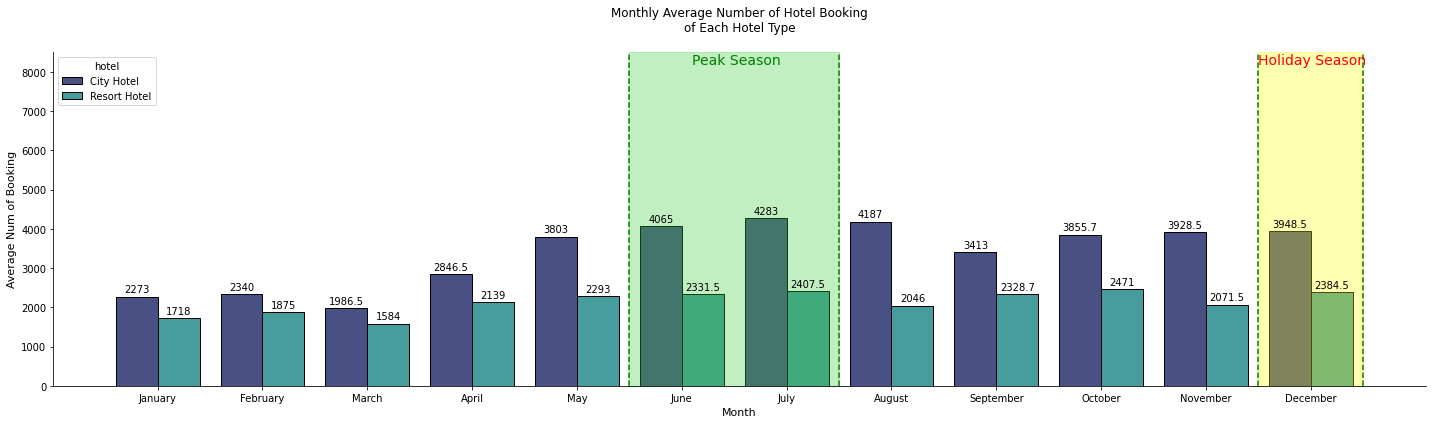

In [24]:
import seaborn as sns
font ={'color':'black',
      'weight':'normal',
      'size':11}
fig,ax = plt.subplots(figsize=(20,6))
plt.title('Monthly Average Number of Hotel Booking\nof Each Hotel Type\n')
sns.barplot(x='month',y='avg_customer_x',data=merge,hue='hotel',edgecolor='black',palette='mako')

plt.xlabel('Month',fontsize=11)
plt.xticks(np.arange(12),['January','February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November', 'December'])
plt.ylabel('Average Num of Booking',fontsize=11)
plt.ylim(0, 8500)


plt.bar_label(ax.containers[0],padding=2)
plt.bar_label(ax.containers[1],padding=2)

plt.axvline(4.5,ls='--',color='green')
plt.axvline(6.5,ls='--',color='green')
plt.stackplot(np.arange(4.5,7.5),[[8500]],color='limegreen',alpha=0.3)
plt.text(x=5.1,y=8300,s='Peak Season',fontsize=14,color='green',va='center')

plt.axvline(10.5,ls='--',color='green')
plt.axvline(11.5,ls='--',color='green')
plt.stackplot(np.arange(10.5,12.5),[[8500]],color='yellow',alpha=0.3)
plt.text(x=10.5,y=8300,s='Holiday Season',fontsize=14,color='red',va='center')

sns.despine()
plt.tight_layout()

In [25]:
bulan = [6,7]
peak = book[book['month'].isin(bulan)]

In [26]:
for kolom in peak:
    print(f'''value count{kolom}: ''')
    print(peak[kolom].value_counts())
    print()

value counthotel: 
City Hotel      8578
Resort Hotel    5085
Name: hotel, dtype: int64

value countis_canceled: 
0    13663
Name: is_canceled, dtype: int64

value countlead_time: 
0      782
1      425
2      292
5      256
3      239
      ... 
326      1
263      1
313      1
245      1
408      1
Name: lead_time, Length: 347, dtype: int64

value countarrival_date_year: 
2018    6925
2019    6738
Name: arrival_date_year, dtype: int64

value countarrival_date_month: 
July    7103
June    6560
Name: arrival_date_month, dtype: int64

value countarrival_date_week_number: 
21    1793
15    1641
17    1620
18    1609
20    1563
19    1534
16    1428
22    1145
14     866
23     378
13      86
Name: arrival_date_week_number, dtype: int64

value countarrival_date_day_of_month: 
9     561
29    554
5     525
26    521
17    485
28    482
8     475
20    472
30    469
22    466
15    461
11    460
2     457
18    455
19    451
25    448
13    447
16    446
23    444
6     440
14    433
24    4

## 3. Total Cancel Based on Stay Duration

In [27]:
df_hotel['duration'] = df_hotel['stays_in_weekend_nights'] + df_hotel['stays_in_weekdays_nights']
df_hotel['duration'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2     27632
3     27064
1     21005
4     17373
7      8648
5      7771
6      3846
8      1155
10     1135
14      913
9       840
0       645
11      393
12      220
13      141
15       72
21       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
22       13
29       13
30       13
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
38        1
48        1
46        1
45        1
69        1
60        1
34        1
Name: duration, dtype: int64

In [28]:
bins = [0,1,3,5,7,14,21,28,35,70]
df_hotel['duration_bin'] = pd.cut(df_hotel['duration'],bins=bins)
df_hotel['duration_bin'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(1, 3]      54696
(3, 5]      25144
(0, 1]      21005
(5, 7]      12494
(7, 14]      4797
(14, 21]      274
(21, 28]      108
(28, 35]       35
(35, 70]       12
Name: duration_bin, dtype: int64

In [29]:
cancel = df_hotel.groupby(['hotel','duration_bin'],as_index=False).apply(lambda x: pd.Series({'total_cancel':x.is_canceled.sum()}))
cancel

,hotel,duration_bin,total_cancel
0,City Hotel,"(0, 1]",4103
1,City Hotel,"(1, 3]",19914
2,City Hotel,"(3, 5]",6628
3,City Hotel,"(5, 7]",1746
4,City Hotel,"(7, 14]",558
5,City Hotel,"(14, 21]",76
6,City Hotel,"(21, 28]",21
7,City Hotel,"(28, 35]",20
8,City Hotel,"(35, 70]",0
9,Resort Hotel,"(0, 1]",1168


In [30]:
total= df_hotel.groupby(['hotel','duration_bin'],as_index=False).apply(lambda x: pd.Series({'total_booking':x.is_canceled.count()}))
total

,hotel,duration_bin,total_booking
0,City Hotel,"(0, 1]",13258
1,City Hotel,"(1, 3]",42786
2,City Hotel,"(3, 5]",17532
3,City Hotel,"(5, 7]",4102
4,City Hotel,"(7, 14]",1069
5,City Hotel,"(14, 21]",105
6,City Hotel,"(21, 28]",25
7,City Hotel,"(28, 35]",21
8,City Hotel,"(35, 70]",1
9,Resort Hotel,"(0, 1]",7747


In [31]:
merge2 = cancel.merge(total, on=['hotel','duration_bin'])
merge2['percentage'] = round((merge2['total_cancel']/merge2['total_booking'])*100,2)
merge2

,hotel,duration_bin,total_cancel,total_booking,percentage
0,City Hotel,"(0, 1]",4103,13258,30.95
1,City Hotel,"(1, 3]",19914,42786,46.54
2,City Hotel,"(3, 5]",6628,17532,37.81
3,City Hotel,"(5, 7]",1746,4102,42.56
4,City Hotel,"(7, 14]",558,1069,52.20
5,City Hotel,"(14, 21]",76,105,72.38
6,City Hotel,"(21, 28]",21,25,84.00
7,City Hotel,"(28, 35]",20,21,95.24
8,City Hotel,"(35, 70]",0,1,0.00
9,Resort Hotel,"(0, 1]",1168,7747,15.08


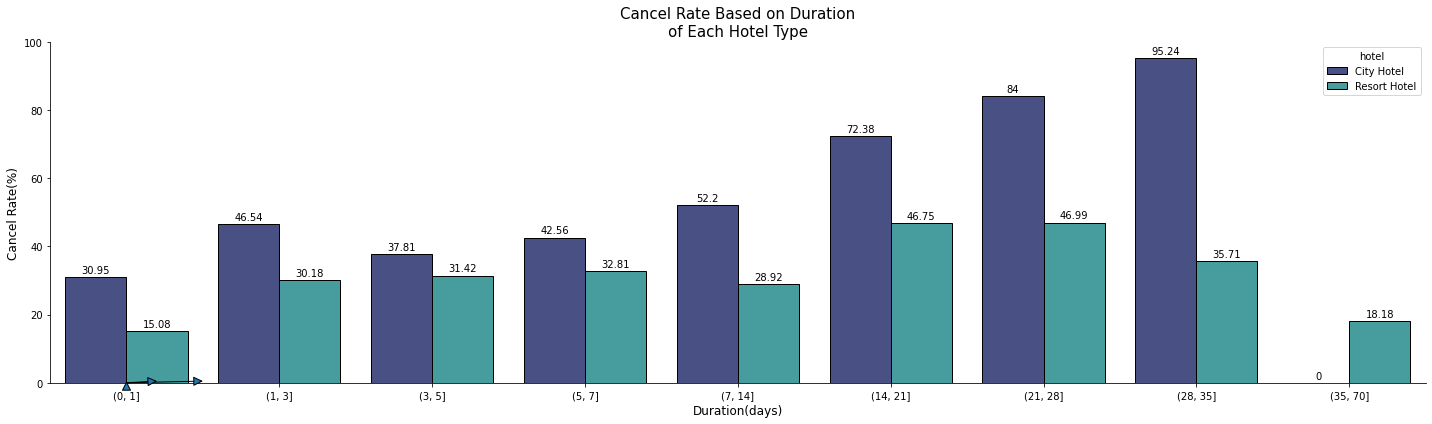

In [57]:
fig,ax = plt.subplots(figsize=(20,6))
plt.title('Cancel Rate Based on Duration\nof Each Hotel Type',fontsize=15)
sns.barplot(x='duration_bin',y='percentage',data=merge2,hue='hotel',edgecolor='black',palette='mako')

plt.xlabel('Duration(days)',fontsize=12)
plt.ylabel('Cancel Rate(%)',fontsize=12)
plt.ylim(0, 100)


plt.bar_label(ax.containers[0],padding=2)
plt.bar_label(ax.containers[1],padding=2)


sns.despine()
plt.tight_layout()

In [ ]:
durasi = df_hotel[df_hotel['duration_bin']==pd.Interval(28,35,closed='right')]

## 4. Cancel Rate Based on Lead Time

In [ ]:
df_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,month,duration,duration_bin
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,Personal,0.00,0,0,Check-Out,2,9,0,NaN
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,Personal,0.00,0,0,Check-Out,2,9,0,NaN
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,Personal,75.00,0,0,Check-Out,1,9,1,"(0.0, 1.0]"
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,Personal,75.00,0,0,Check-Out,1,9,1,"(0.0, 1.0]"
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,Personal,98.00,0,1,Check-Out,2,9,2,"(1.0, 3.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,No Deposit,Personal,96.14,0,0,Check-Out,2,10,7,"(5.0, 7.0]"
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,No Deposit,Personal,225.43,0,2,Check-Out,3,10,7,"(5.0, 7.0]"
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,No Deposit,Personal,157.71,0,4,Check-Out,2,10,7,"(5.0, 7.0]"
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,No Deposit,Personal,104.40,0,0,Check-Out,2,10,7,"(5.0, 7.0]"


In [ ]:
bins2 = [0,30,60,90,120,150,180,210,240,270,300,330,360,740]
df_hotel['lead_bin'] = pd.cut(df_hotel['lead_time'],bins=bins2)
df_hotel['lead_bin'].value_counts()

<ipython-input-31-1a30b0ab659a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotel['lead_bin'] = pd.cut(df_hotel['lead_time'],bins=bins2)


(0, 30]       32316
(30, 60]      16952
(60, 90]      12577
(90, 120]     10429
(120, 150]     8137
(150, 180]     7854
(180, 210]     5659
(210, 240]     4309
(270, 300]     3425
(360, 740]     3415
(240, 270]     3403
(300, 330]     2755
(330, 360]     1715
Name: lead_bin, dtype: int64

In [ ]:
lead = df_hotel.groupby(['hotel','lead_bin'],as_index=False).apply(lambda x: pd.Series({'cancel': x.is_canceled.sum()}))
lead

,hotel,lead_bin,cancel
0,City Hotel,"(0, 30]",4922
1,City Hotel,"(30, 60]",4608
2,City Hotel,"(60, 90]",3692
3,City Hotel,"(90, 120]",3486
4,City Hotel,"(120, 150]",2542
5,City Hotel,"(150, 180]",2716
6,City Hotel,"(180, 210]",1793
7,City Hotel,"(210, 240]",1280
8,City Hotel,"(240, 270]",1237
9,City Hotel,"(270, 300]",1859


In [ ]:
booking_lead = df_hotel.groupby(['hotel','lead_bin'],as_index=False).apply(lambda x: pd.Series({'total_booking':x.is_canceled.count()}))
booking_lead

,hotel,lead_bin,total_booking
0,City Hotel,"(0, 30]",20213
1,City Hotel,"(30, 60]",11874
2,City Hotel,"(60, 90]",8902
3,City Hotel,"(90, 120]",7442
4,City Hotel,"(120, 150]",5606
5,City Hotel,"(150, 180]",5158
6,City Hotel,"(180, 210]",3593
7,City Hotel,"(210, 240]",2504
8,City Hotel,"(240, 270]",2117
9,City Hotel,"(270, 300]",2519


In [ ]:
merge_lead = lead.merge(booking_lead, on=['hotel','lead_bin'])
merge_lead['percentage'] = round((merge_lead['cancel']/merge_lead['total_booking'])*100,2)
merge_lead

,hotel,lead_bin,cancel,total_booking,percentage
0,City Hotel,"(0, 30]",4922,20213,24.35
1,City Hotel,"(30, 60]",4608,11874,38.81
2,City Hotel,"(60, 90]",3692,8902,41.47
3,City Hotel,"(90, 120]",3486,7442,46.84
4,City Hotel,"(120, 150]",2542,5606,45.34
5,City Hotel,"(150, 180]",2716,5158,52.66
6,City Hotel,"(180, 210]",1793,3593,49.90
7,City Hotel,"(210, 240]",1280,2504,51.12
8,City Hotel,"(240, 270]",1237,2117,58.43
9,City Hotel,"(270, 300]",1859,2519,73.80


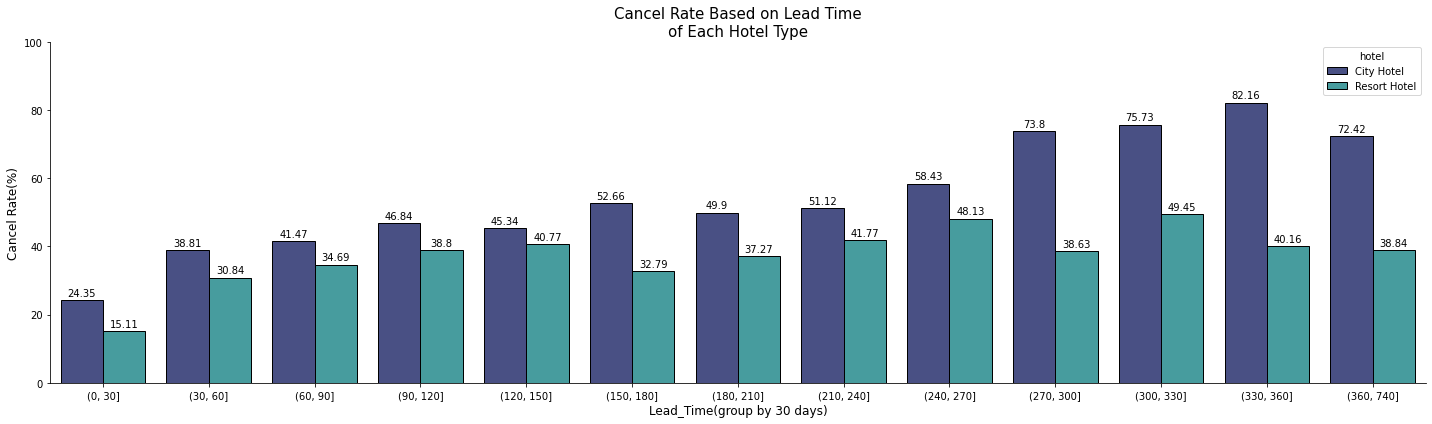

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))
plt.title('Cancel Rate Based on Lead Time\nof Each Hotel Type',fontsize=15)
sns.barplot(x='lead_bin',y='percentage',data=merge_lead,hue='hotel',edgecolor='black',palette='mako')

plt.xlabel('Lead_Time(group by 30 days)',fontsize=12)
plt.ylabel('Cancel Rate(%)',fontsize=12)
plt.ylim(0, 100)


plt.bar_label(ax.containers[0],padding=2)
plt.bar_label(ax.containers[1],padding=2)

sns.despine()
plt.tight_layout()

In [ ]:
coba = df_hotel[df_hotel['duration_bin']==pd.Interval(28,35,closed='right')]

In [ ]:
for column in coba:
    print(f'''value count {column}:''')
    print(coba[column].value_counts())
    print()

value count hotel:
City Hotel      21
Resort Hotel    14
Name: hotel, dtype: int64

value count is_canceled:
1    25
0    10
Name: is_canceled, dtype: int64

value count lead_time:
13     3
59     2
21     2
25     2
123    2
9      2
12     2
119    1
1      1
30     1
41     1
65     1
16     1
11     1
28     1
10     1
149    1
88     1
192    1
140    1
148    1
92     1
24     1
74     1
182    1
73     1
3      1
Name: lead_time, dtype: int64

value count arrival_date_year:
2018    17
2019    14
2017     4
Name: arrival_date_year, dtype: int64

value count arrival_date_month:
March        15
January       8
April         6
September     2
February      1
June          1
May           1
December      1
Name: arrival_date_month, dtype: int64

value count arrival_date_week_number:
4     4
2     4
1     4
49    3
3     3
6     3
46    2
9     2
7     2
47    2
18    1
26    1
44    1
48    1
30    1
45    1
Name: arrival_date_week_number, dtype: int64

value count arrival_date_day_o

In [ ]:
coba2 = df_hotel[df_hotel['lead_time'] > 240]

In [ ]:
for kolom in coba2:
    print(f'''value count{kolom}''')
    print(coba2[kolom].value_counts())
    print()

value counthotel
City Hotel      10840
Resort Hotel     3873
Name: hotel, dtype: int64

value countis_canceled
1    9474
0    5239
Name: is_canceled, dtype: int64

value countlead_time
277    318
265    230
247    206
316    200
245    200
      ... 
709      1
532      1
371      1
424      1
463      1
Name: lead_time, Length: 238, dtype: int64

value countarrival_date_year
2018    6779
2019    4407
2017    3527
Name: arrival_date_year, dtype: int64

value countarrival_date_month
November     2599
September    2319
December     2224
October      1823
August       1680
July         1425
June          737
January       684
February      481
May           447
March         162
April         132
Name: arrival_date_month, dtype: int64

value countarrival_date_week_number
38    763
42    749
39    697
41    580
30    570
40    527
25    497
29    490
26    487
27    480
32    471
28    470
33    458
22    452
34    445
37    424
43    415
31    407
36    404
21    380
20    362
24    345
4